In [1]:
import argparse
import easydict

from utils.config import *
from utils.count_model import *
from agents import *
from torchsummaryX import summary


In [2]:
import random

RandomListOfIntegers = [random.randint(0, 99999) for iter in range(5)]
print(RandomListOfIntegers)

[22604, 24114, 7910, 94153, 80338]


# pruning method : 

## greedy - thinet 
## lasso - channel pruning 
## random - random pruning
## max_out - small norm channel pruning

In [3]:
total_best = []
total_history = []
config = easydict.EasyDict()
config.exp_name = "vgg16_exp_cifar100_0"
config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
config.cuda = True
config.gpu_device = 0
config.seed = RandomListOfIntegers[0]
# config.milestones = [10, 20,30,40]
config.milestones = [1, 2,3,4]

config.gamma = 0.9
config.img_size = 32
config.num_classes = 100
config.data_mode = "download"
config.data_loader_workers = 4
config.pin_memory = True
config.async_loading = True
config.batch_size = 256
config.async_loading = True
config.max_epoch = 40
torch.cuda.init()

agent = globals()["VGG_BN_cifar"](config)
agent.init_graph()
agent.load_checkpoint(config.load_file)
agent.compress(method = 'random',k=0.47) 
best,history = agent.train(specializing=False, freeze_conv=False,cosine_decay = False) # cosine_decay = False -- step lr
total_best.append(best)
total_history.append(history)
summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))
    

Files already downloaded and verified


Epoch-0-:   0%|                                                                                | 0/196 [00:00<?, ?it/s]

[1, 4, 5, 8, 10, 11, 14, 15, 16, 17, 20, 24, 28, 29, 35, 38, 39, 43, 44, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61]
[1, 3, 7, 10, 11, 13, 15, 18, 20, 23, 24, 25, 30, 31, 33, 35, 38, 40, 44, 46, 49, 50, 51, 52, 54, 55, 56, 57, 59, 63]
[0, 3, 9, 11, 12, 13, 14, 16, 17, 20, 23, 24, 25, 26, 30, 31, 33, 34, 35, 36, 41, 42, 45, 49, 50, 52, 55, 57, 59, 60, 62, 63, 64, 65, 70, 71, 72, 80, 82, 83, 85, 86, 89, 92, 93, 98, 99, 100, 101, 102, 104, 105, 106, 108, 114, 118, 119, 121, 122, 126]
[0, 2, 3, 4, 5, 6, 9, 10, 11, 14, 15, 16, 19, 24, 26, 27, 28, 29, 30, 34, 36, 37, 38, 40, 42, 45, 51, 52, 53, 58, 59, 61, 62, 63, 64, 70, 76, 78, 79, 80, 85, 86, 91, 93, 95, 96, 98, 102, 103, 107, 111, 114, 115, 117, 120, 121, 122, 123, 126, 127]
[1, 5, 9, 12, 15, 21, 23, 24, 26, 28, 29, 30, 31, 34, 37, 39, 41, 42, 44, 45, 46, 47, 48, 50, 51, 52, 53, 57, 58, 60, 62, 67, 71, 74, 78, 80, 81, 86, 88, 92, 95, 96, 97, 98, 101, 103, 107, 110, 111, 115, 116, 117, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 134

Valiation at -0-:   0%|                                                                         | 0/40 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.252386796231172	Top1 Acc: 0.06421999999761581


Epoch-1-:   0%|                                                                                | 0/196 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.927723026275635	Top1 Acc: 0.1055


Valiation at -1-:   0%|                                                                         | 0/40 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.7603315127139187	Top1 Acc: 0.13358


Epoch-2-:   0%|                                                                                | 0/196 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 3.629436808824539	Top1 Acc: 0.1522


Valiation at -2-:   0%|                                                                         | 0/40 [00:00<?, ?it/s]

Training at epoch-2 | loss: 3.5336249628845526	Top1 Acc: 0.17055999999523164


Epoch-3-:   0%|                                                                                | 0/196 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 3.4128686130046844	Top1 Acc: 0.1911


Valiation at -3-:   0%|                                                                         | 0/40 [00:00<?, ?it/s]

Training at epoch-3 | loss: 3.39131115529002	Top1 Acc: 0.19035999999523162


Epoch-4-:   0%|                                                                                | 0/196 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 3.2723335444927217	Top1 Acc: 0.2137


Valiation at -4-:   0%|                                                                         | 0/40 [00:00<?, ?it/s]

Training at epoch-4 | loss: 3.2775318756395455	Top1 Acc: 0.21063999999523164


Epoch-5-:   0%|                                                                                | 0/196 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 3.1775341629981995	Top1 Acc: 0.2337


Valiation at -5-:   0%|                                                                         | 0/40 [00:00<?, ?it/s]

Training at epoch-5 | loss: 3.188985673748717	Top1 Acc: 0.22794000000953674


Epoch-6-:   0%|                                                                                | 0/196 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 3.0832936584949495	Top1 Acc: 0.2492


Valiation at -6-:   0%|                                                                         | 0/40 [00:00<?, ?it/s]

Training at epoch-6 | loss: 3.103666677766917	Top1 Acc: 0.24140000000953674


Epoch-7-:   0%|                                                                                | 0/196 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 3.028993105888367	Top1 Acc: 0.2568


Valiation at -7-:   0%|                                                                         | 0/40 [00:00<?, ?it/s]

Training at epoch-7 | loss: 3.0336365419991163	Top1 Acc: 0.25474000002861025


Epoch-8-:   0%|                                                                                | 0/196 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.9501812934875487	Top1 Acc: 0.2751


Valiation at -8-:   0%|                                                                         | 0/40 [00:00<?, ?it/s]

Training at epoch-8 | loss: 2.9642528319845396	Top1 Acc: 0.26694000002861024


Epoch-9-:   0%|                                                                                | 0/196 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.8860182881355287	Top1 Acc: 0.2844


Valiation at -9-:   0%|                                                                         | 0/40 [00:00<?, ?it/s]

Training at epoch-9 | loss: 2.9045325091906955	Top1 Acc: 0.27576000001907347


Epoch-10-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.84156249165535	Top1 Acc: 0.2963


Valiation at -10-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-10 | loss: 2.8503159065635835	Top1 Acc: 0.28594


Epoch-11-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.7877181828022004	Top1 Acc: 0.3075


Valiation at -11-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-11 | loss: 2.7966721240355046	Top1 Acc: 0.2978200000190735


Epoch-12-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.751166135072708	Top1 Acc: 0.3115


Valiation at -12-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-12 | loss: 2.7388597532194487	Top1 Acc: 0.31


Epoch-13-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.7221392154693604	Top1 Acc: 0.3203


Valiation at -13-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-13 | loss: 2.6935197747483546	Top1 Acc: 0.3169000000190735


Epoch-14-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.6538229644298554	Top1 Acc: 0.3323


Valiation at -14-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-14 | loss: 2.6534624282194645	Top1 Acc: 0.3266200000095367


Epoch-15-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.6283330619335175	Top1 Acc: 0.3379


Valiation at -15-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-15 | loss: 2.6027669310569763	Top1 Acc: 0.3374800000286102


Epoch-16-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.5695229172706604	Top1 Acc: 0.3484


Valiation at -16-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-16 | loss: 2.5613877858434404	Top1 Acc: 0.34536000001907347


Epoch-17-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 2.529448837041855	Top1 Acc: 0.3586


Valiation at -17-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-17 | loss: 2.517776525750452	Top1 Acc: 0.35301999999046324


Epoch-18-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.4853110730648043	Top1 Acc: 0.3637


Valiation at -18-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-18 | loss: 2.478776969471756	Top1 Acc: 0.3629200000095367


Epoch-19-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 2.4681325376033785	Top1 Acc: 0.3708


Valiation at -19-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-19 | loss: 2.4351612037541917	Top1 Acc: 0.36993999999046323


Epoch-20-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 2.435019797086716	Top1 Acc: 0.3773


Valiation at -20-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-20 | loss: 2.4019456043535348	Top1 Acc: 0.37950000001907347


Epoch-21-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 2.417087954282761	Top1 Acc: 0.3769


Valiation at -21-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-21 | loss: 2.3654221989670576	Top1 Acc: 0.38616


Epoch-22-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 2.3657031118869782	Top1 Acc: 0.391


Valiation at -22-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-22 | loss: 2.3239016824839065	Top1 Acc: 0.39650000002861024


Epoch-23-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 2.323321318626404	Top1 Acc: 0.3951


Valiation at -23-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-23 | loss: 2.297295007170463	Top1 Acc: 0.4019000000286102


Epoch-24-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 2.302540123462677	Top1 Acc: 0.4031


Valiation at -24-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-24 | loss: 2.2597005683548597	Top1 Acc: 0.40714


Epoch-25-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 2.3169088900089263	Top1 Acc: 0.3966


Valiation at -25-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-25 | loss: 2.2259884056996326	Top1 Acc: 0.41664000002861024


Epoch-26-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 2.253116574883461	Top1 Acc: 0.411


Valiation at -26-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-26 | loss: 2.201002473733863	Top1 Acc: 0.4202600000095367


Epoch-27-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 2.246628138422966	Top1 Acc: 0.4101


Valiation at -27-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-27 | loss: 2.16280810017975	Top1 Acc: 0.42911999998092654


Epoch-28-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 2.214447060227394	Top1 Acc: 0.4221


Valiation at -28-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-28 | loss: 2.1331982576117223	Top1 Acc: 0.4353800000190735


Epoch-29-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 2.2127441108226775	Top1 Acc: 0.4175


Valiation at -29-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-29 | loss: 2.1028130474139233	Top1 Acc: 0.44342


Epoch-30-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 2.1719580829143523	Top1 Acc: 0.4297


Valiation at -30-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-30 | loss: 2.0724096389449373	Top1 Acc: 0.4498600000190735


Epoch-31-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 2.180979293584824	Top1 Acc: 0.4277


Valiation at -31-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-31 | loss: 2.0458351914979973	Top1 Acc: 0.4568599999904633


Epoch-32-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 2.1364391833543777	Top1 Acc: 0.4392


Valiation at -32-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-32 | loss: 2.0198238850856316	Top1 Acc: 0.46228000000953673


Epoch-33-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 2.136827802658081	Top1 Acc: 0.4385


Valiation at -33-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.9940958187288167	Top1 Acc: 0.46754000002861024


Epoch-34-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 2.1220135569572447	Top1 Acc: 0.441


Valiation at -34-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.9610581848086144	Top1 Acc: 0.4757199999809265


Epoch-35-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 2.069994959235191	Top1 Acc: 0.4534


Valiation at -35-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.933086344782187	Top1 Acc: 0.4819400000286102


Epoch-36-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 2.060769188404083	Top1 Acc: 0.4518


Valiation at -36-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.9121398822385438	Top1 Acc: 0.4856


Epoch-37-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 2.0736447364091872	Top1 Acc: 0.4473


Valiation at -37-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.8875932121763423	Top1 Acc: 0.48975999999046327


Epoch-38-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 2.0595483839511872	Top1 Acc: 0.4533


Valiation at -38-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.8636783957481384	Top1 Acc: 0.49736


Epoch-39-:   0%|                                                                               | 0/196 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 2.059434062242508	Top1 Acc: 0.4599


Valiation at -39-:   0%|                                                                        | 0/40 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.8484240502727276	Top1 Acc: 0.50168


Valiation at -39-: 100%|███████████████████████████████████████████████████████████████| 40/40 [00:03<00:00, 11.05it/s]

Validation results at epoch-39 | loss: 2.0487307518720628	Top1 Acc: 0.4593
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 60, 3, 3]  [1, 60, 16, 16]     16.26k   
8_features.BatchNorm2d_8                [60]  [1, 60, 16, 16]      120.0   
9_features.ReLU_9                          -  [1, 60, 16, 16]          -   
10_features.C

,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_features.Conv2d_0,"[3, 30, 3, 3]","[1, 30, 32, 32]",840.0,829440.0
1_features.BatchNorm2d_1,[30],"[1, 30, 32, 32]",60.0,30.0
2_features.ReLU_2,-,"[1, 30, 32, 32]",NaN,NaN
3_features.Conv2d_3,"[30, 30, 3, 3]","[1, 30, 32, 32]",8130.0,8294400.0
4_features.BatchNorm2d_4,[30],"[1, 30, 32, 32]",60.0,30.0
5_features.ReLU_5,-,"[1, 30, 32, 32]",NaN,NaN
6_features.MaxPool2d_6,-,"[1, 30, 16, 16]",NaN,NaN
7_features.Conv2d_7,"[30, 60, 3, 3]","[1, 60, 16, 16]",16260.0,4147200.0
8_features.BatchNorm2d_8,[60],"[1, 60, 16, 16]",120.0,60.0


In [4]:
best

0.4599

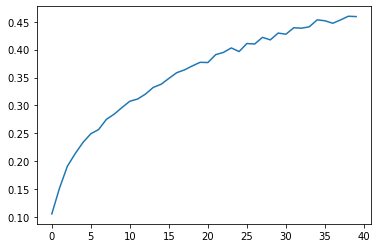

In [5]:
import matplotlib.pyplot as plt
plt.plot(history)

In [6]:
summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 60, 3, 3]  [1, 60, 16, 16]     16.26k   
8_features.BatchNorm2d_8                [60]  [1, 60, 16, 16]      120.0   
9_features.ReLU_9                          -  [1, 60, 16, 16]          -   
10_features.Conv2d_10         [60, 60, 3, 3]  [1, 60, 16, 16]     32.46k   
11_features.

,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_features.Conv2d_0,"[3, 30, 3, 3]","[1, 30, 32, 32]",840.0,829440.0
1_features.BatchNorm2d_1,[30],"[1, 30, 32, 32]",60.0,30.0
2_features.ReLU_2,-,"[1, 30, 32, 32]",NaN,NaN
3_features.Conv2d_3,"[30, 30, 3, 3]","[1, 30, 32, 32]",8130.0,8294400.0
4_features.BatchNorm2d_4,[30],"[1, 30, 32, 32]",60.0,30.0
5_features.ReLU_5,-,"[1, 30, 32, 32]",NaN,NaN
6_features.MaxPool2d_6,-,"[1, 30, 16, 16]",NaN,NaN
7_features.Conv2d_7,"[30, 60, 3, 3]","[1, 60, 16, 16]",16260.0,4147200.0
8_features.BatchNorm2d_8,[60],"[1, 60, 16, 16]",120.0,60.0


In [7]:
for i in history:
    print(i)

0.1055
0.1522
0.1911
0.2137
0.2337
0.2492
0.2568
0.2751
0.2844
0.2963
0.3075
0.3115
0.3203
0.3323
0.3379
0.3484
0.3586
0.3637
0.3708
0.3773
0.3769
0.391
0.3951
0.4031
0.3966
0.411
0.4101
0.4221
0.4175
0.4297
0.4277
0.4392
0.4385
0.441
0.4534
0.4518
0.4473
0.4533
0.4599
0.4593


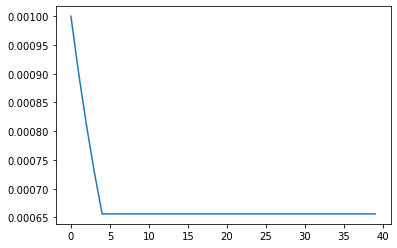

In [8]:
plt.plot(agent.lr_list)

In [9]:
agent.lr_list

[0.001,
 0.0009000000000000001,
 0.0008100000000000001,
 0.000729,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001,
 0.0006561000000000001]

In [10]:
agent.config.milestones

[1, 2, 3, 4]